## Crypto data mining using Coin Market Cap API

In [187]:
#https://coinmarketcap.com/

In [74]:
import pandas as pd
from time import time
from time import sleep
import os

In [163]:
def API_runner():
    global df
    ##https://coinmarketcap.com/api/documentation/v1/#section/Quick-Start-Guide:~:text=%23This%20example%20uses,(e)
    
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9e51506f-8e98-45cb-85ff-378954414997',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df
    #df = df.append(df2)

    #Creating csv 
    #If csv doesn't exit create csv
    if not os.path.isfile(r'C:\Users\User.SHAWONALAM\OneDrive\Documents\API Crypto mining using python pandas\Crypto data.csv'):
        df.to_csv(r'C:\Users\User.SHAWONALAM\OneDrive\Documents\API Crypto mining using python pandas\Crypto data.csv', header = 'Column_names')
    else:
        #If csv already exists then append('a') with previous data
        df.to_csv(r'C:\Users\User.SHAWONALAM\OneDrive\Documents\API Crypto mining using python pandas\Crypto data.csv', mode='a', header = False)

#API_runner()
#print("done")

In [165]:
# Run API_runner() function to extract data

for i in range(20): #API call 20 times
    API_runner() 
    print("API scan completed.")
    sleep(30) #timer to recall API
exit()

API scan completed.
API scan completed.
API scan completed.
API scan completed.
API scan completed.
API scan completed.
API scan completed.
API scan completed.
API scan completed.
API scan completed.
API scan completed.


KeyboardInterrupt: 

### Read CSV

In [167]:

new_df = pd.read_csv(r'C:\Users\User.SHAWONALAM\OneDrive\Documents\API Crypto mining using python pandas\Crypto data.csv')
pd.set_option('display.max_columns', None) 
new_df.head(5)

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11642,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.974296e+07,1.974296e+07,False,NaN,1,NaN,NaN,NaN,2024-08-21T12:21:00.000Z,59306.448001,2.692294e+10,-4.1060,-0.197229,-2.254230,-3.395020,-12.199475,-7.707676,-15.049249,1.170885e+12,55.7937,1.245435e+12,NaN,2024-08-21T12:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 14:24:28.617880
1,1,1027,Ethereum,ETH,ethereum,9236,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202914e+08,1.202914e+08,True,NaN,2,NaN,NaN,NaN,2024-08-21T12:20:00.000Z,2574.447040,1.189882e+10,-2.4069,-0.421793,-2.840658,-6.266393,-26.396268,-26.235750,-34.410095,3.096838e+11,14.7594,3.096838e+11,NaN,2024-08-21T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 14:24:28.617880
2,2,825,Tether USDt,USDT,tether,94982,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.172945e+11,1.202584e+11,True,NaN,3,NaN,NaN,NaN,2024-08-21T12:20:00.000Z,1.000203,4.757033e+10,-1.9856,-0.007230,-0.029560,-0.039387,0.010293,0.072985,0.073981,1.173182e+11,5.5915,1.202828e+11,NaN,2024-08-21T12:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-21 14:24:28.617880
3,3,1839,BNB,BNB,bnb,2214,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459359e+08,1.459359e+08,False,NaN,4,NaN,NaN,NaN,2024-08-21T12:20:00.000Z,553.438396,2.044868e+09,10.8522,-0.478141,-2.870693,4.350497,-7.617046,-5.650025,-9.544004,8.076653e+10,3.8772,8.076653e+10,NaN,2024-08-21T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 14:24:28.617880
4,4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.664307e+08,5.827284e+08,True,NaN,5,NaN,NaN,NaN,2024-08-21T12:20:00.000Z,141.164591,1.628036e+09,-26.6663,-0.521080,-3.317088,-4.841406,-21.550380,5.073977,-19.748820,6.584350e+10,3.1390,8.226062e+10,NaN,2024-08-21T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 14:24:28.617880


### Group by percent_change_ to pivot table

In [170]:
df3 = new_df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 
                                          'quote.USD.percent_change_24h',
                                         'quote.USD.percent_change_7d',
                                         'quote.USD.percent_change_30d',
                                         'quote.USD.percent_change_60d',
                                         'quote.USD.percent_change_90d']].mean()
df3.head(10)

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.067826,-2.267769,-3.413804,-12.205316,-7.688843,-15.057434
Ethereum,-0.273424,-2.884915,-6.430910,-26.499901,-26.237843,-34.508058
Tether USDt,-0.002022,-0.044948,-0.034004,0.006115,0.059385,0.065012
BNB,-0.540954,-2.913424,4.299735,-7.817823,-5.683372,-9.578123
Solana,-0.375536,-3.242913,-4.885508,-21.720038,5.084918,-19.552438
USDC,-0.008040,-0.011133,-0.013373,-0.005746,-0.014819,-0.016395
XRP,-0.542616,-1.853666,2.543207,-2.840519,22.540952,12.553859
Toncoin,-0.050119,-1.600948,-5.448603,-4.401509,-6.414152,4.394022
Dogecoin,-0.465449,-1.655617,-2.359917,-25.202197,-16.817260,-38.533921


### Stacking dataframe 

In [173]:
df4 = df3.stack()
#pd.set_option('display.max_rows', None) 
print(type(df4))
df4

<class 'pandas.core.series.Series'>


name                                      
Bitcoin       quote.USD.percent_change_1h     -0.067826
              quote.USD.percent_change_24h    -2.267769
              quote.USD.percent_change_7d     -3.413804
              quote.USD.percent_change_30d   -12.205316
              quote.USD.percent_change_60d    -7.688843
                                                ...    
Bitcoin Cash  quote.USD.percent_change_24h    -1.392605
              quote.USD.percent_change_7d     -2.769276
              quote.USD.percent_change_30d   -13.942821
              quote.USD.percent_change_60d   -13.107104
              quote.USD.percent_change_90d   -33.724160
Length: 90, dtype: float64

In [175]:
# When stacking dataframe, it is changed into Pandas.Series 
# So have to convert the pandas.Series -> pandas.DataFrame

### Converting pandas..Series -> pandas..DataFrame

In [178]:
df5 = df4.to_frame(name = 'values')
print(type(df5))

<class 'pandas.core.frame.DataFrame'>


In [180]:
df4.count()

90

### Indexing Column

In [183]:
index = pd.Index(range(90))
df8 = df5.reset_index()
df8.head(9)

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.067826
1,Bitcoin,quote.USD.percent_change_24h,-2.267769
2,Bitcoin,quote.USD.percent_change_7d,-3.413804
3,Bitcoin,quote.USD.percent_change_30d,-12.205316
4,Bitcoin,quote.USD.percent_change_60d,-7.688843
5,Bitcoin,quote.USD.percent_change_90d,-15.057434
6,Ethereum,quote.USD.percent_change_1h,-0.273424
7,Ethereum,quote.USD.percent_change_24h,-2.884915
8,Ethereum,quote.USD.percent_change_7d,-6.430910


### Rename column name

In [186]:
df9 = df8.rename(columns={'level_1': 'percentage_change'})
df9.head(5)

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.067826
1,Bitcoin,quote.USD.percent_change_24h,-2.267769
2,Bitcoin,quote.USD.percent_change_7d,-3.413804
3,Bitcoin,quote.USD.percent_change_30d,-12.205316
4,Bitcoin,quote.USD.percent_change_60d,-7.688843


### Changing column values

In [189]:
df9['percentage_change'] = df9['percentage_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d',
                                 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],
                                ['1h', '24h', '7d', '30d', '60d', '90d'])
df9.head(5)

,name,percentage_change,values
0,Bitcoin,1h,-0.067826
1,Bitcoin,24h,-2.267769
2,Bitcoin,7d,-3.413804
3,Bitcoin,30d,-12.205316
4,Bitcoin,60d,-7.688843


### Visualization

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
#sns.catplot(x='percentage_change', y ='values', hue = 'name', data = df9, kind='point' )

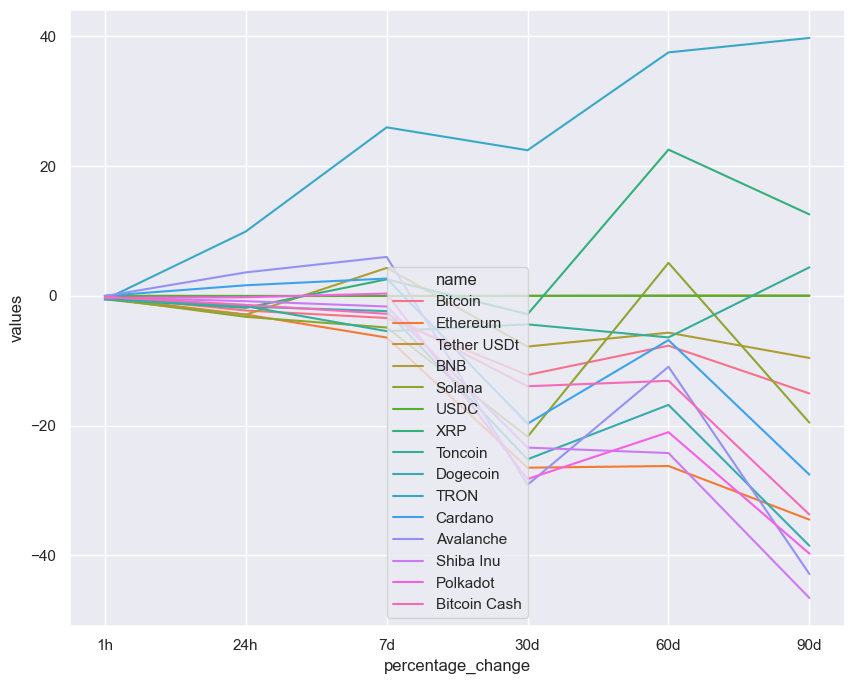

In [196]:
sns.lineplot(x='percentage_change', y='values', data=df9, hue='name')
sns.set_theme(rc={'figure.figsize':(10,8)})

In [198]:
df10 = new_df[['name', 'quote.USD.price', 'Timestamp']]
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,59306.448001,2024-08-21 14:24:28.617880
1,Ethereum,2574.447040,2024-08-21 14:24:28.617880
2,Tether USDt,1.000203,2024-08-21 14:24:28.617880
3,BNB,553.438396,2024-08-21 14:24:28.617880
4,Solana,141.164591,2024-08-21 14:24:28.617880
...,...,...,...
160,Cardano,0.351351,2024-08-21 14:29:33.184552
161,Avalanche,22.944570,2024-08-21 14:29:33.184552
162,Shiba Inu,0.000014,2024-08-21 14:29:33.184552
163,Polkadot,4.532497,2024-08-21 14:29:33.184552


### Bitcoin prices over the time period 

Text(0.5, 1.0, 'Bitcoin prices over time period')

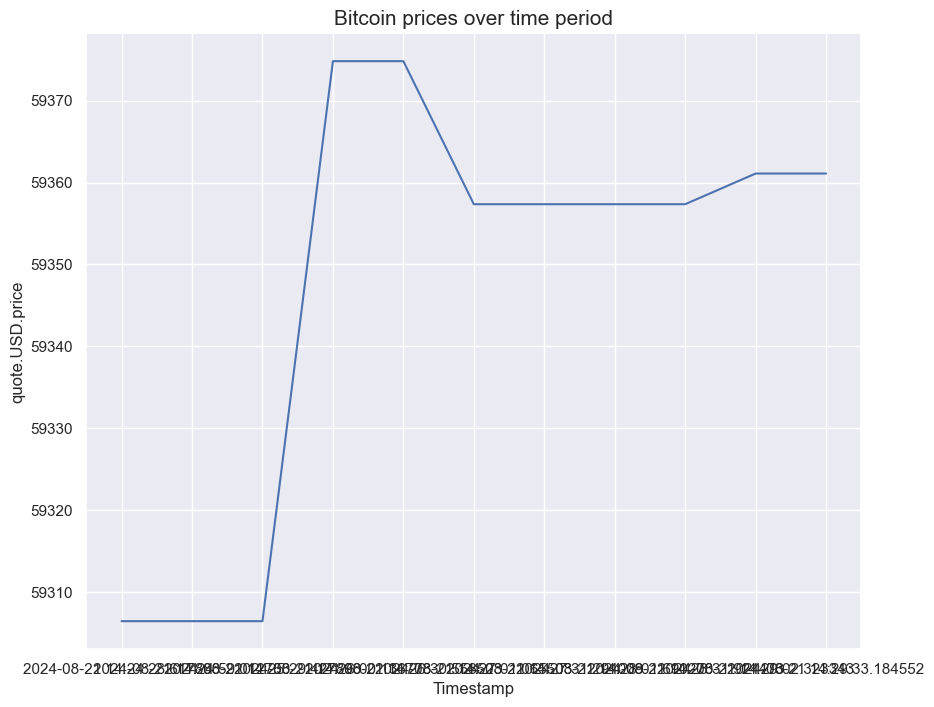

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
df11 = df10.query("name == 'Bitcoin'")
sns.lineplot(x='Timestamp', y='quote.USD.price', data=df11)
sns.set_theme(style = "darkgrid")
plt.title("Bitcoin prices over time period", fontsize= 15)